<a href="https://colab.research.google.com/github/urmiMahapatra/Netfllix_Prediction/blob/main/CapstoneNetflix_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing importnat libreries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
# import the dataset from file
data= pd.read_csv("combined_data_1.txt",header=None,usecols=[0,1,2],names=["Cust_id","Rating","Date_Of_Rating"])
data.head()
# the fist column of nan is regarding the movie id .

,Cust_id,Rating,Date_Of_Rating
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26


In [ ]:
# showing the data info and shape
print(data.shape)
print(data.info)

(1987416, 3)
<bound method DataFrame.info of          Cust_id  Rating Date_Of_Rating
0             1:     NaN            NaN
1        1488844     3.0     2005-09-06
2         822109     5.0     2005-05-13
3         885013     4.0     2005-10-19
4          30878     4.0     2005-12-26
...          ...     ...            ...
1987411    12281     5.0     2005-03-21
1987412    73510     4.0     2005-03-23
1987413  1439225     5.0     2005-05-02
1987414  1206512     3.0     2005-05-29
1987415   243019     5.0        2005-06

[1987416 rows x 3 columns]>


In [ ]:
# finding missing values
data.isnull().any()

,0
Cust_id,False
Rating,True
Date_Of_Rating,True


In [ ]:
data["Rating"].value_counts()
# here we can see that there is no missing value in rating section so it means that those are the movie id's where NAN is present

,count
Rating,
4.0,694234
3.0,556564
5.0,457197
2.0,191195
1.0,87867


In [ ]:
#on the basis of this data we can claculate  the movie count,user counts and rating count of user has rated
movie_count=data["Rating"].isnull().sum()
print(f"The Total movie counts are:{movie_count}")

customer_count=data["Cust_id"].nunique() - movie_count
print(f"The Total customer counts are:{customer_count}")

rating_count=data["Rating"].count() - movie_count
print(f"The Total Customer counts are:{rating_count}")

The Total movie counts are:359
The Total customer counts are:341635
The Total Customer counts are:1986698


In [ ]:
# group by for the showing of distribution of different rating
p= data.groupby("Rating")["Rating"].agg(["count"])
p

,count
Rating,
1.0,87867
2.0,191195
3.0,556564
4.0,694234
5.0,457197


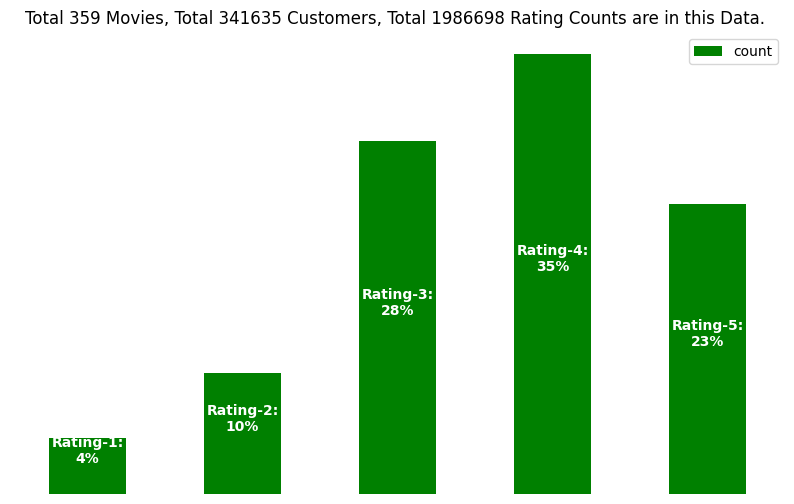

In [ ]:
# Visulalize the rating count

ax=p.plot(kind="bar",figsize=(10,6),color="green")
plt.axis("off") # to clean the x and y axis
plt.title(f"Total {movie_count} Movies, Total {customer_count} Customers, Total {rating_count} Rating Counts are in this Data. ")
for i in range(1,6):
    ax.text(i-1,p.iloc[i-1][0]/2,"Rating-{}:\n{:.0f}%".format(i,p.iloc[i-1][0]*100/p.sum()[0]),color="white",weight="bold",ha="center",va="bottom")
plt.show()

In [ ]:
# add the movie id in column
movie_id= None
movie_col=[]

for i in data["Cust_id"]:
    if ":" in i:
        movie_id= int(i.replace(":",""))
    movie_col.append(movie_id)
data["Movie_id"]= movie_col
# delete NA columns
data= data.dropna()
data

,Cust_id,Rating,Date_Of_Rating,Movie_id
1,1488844,3.0,2005-09-06,1
2,822109,5.0,2005-05-13,1
3,885013,4.0,2005-10-19,1
4,30878,4.0,2005-12-26,1
5,823519,3.0,2004-05-03,1
...,...,...,...,...
1987411,12281,5.0,2005-03-21,359
1987412,73510,4.0,2005-03-23,359
1987413,1439225,5.0,2005-05-02,359
1987414,1206512,3.0,2005-05-29,359


In [ ]:
# prefiltering
#filtering the movie as per less rating

movie_group= data.groupby("Movie_id")["Rating"].count()
movie_group.sort_values(ascending= False)

,Rating
Movie_id,
30,118413
313,99812
191,98720
175,90450
197,81260
...,...
130,86
278,83
100,78


In [ ]:
# setting up a benchmark on movie rating
movie_benchmark = round(movie_group.quantile(.60)) # 60 percent of movies are having 1041 ratings and 30 percent of movies are above 908
movie_benchmark

878

In [ ]:
# reject the movies which are less than 1041 rating
rejected_movies= movie_group[movie_group<movie_benchmark].index
rejected_movies

Index([  1,   2,   4,   7,   9,  10,  11,  12,  13,  14,
       ...
       339, 340, 343, 346, 347, 349, 351, 352, 354, 355],
      dtype='int64', name='Movie_id', length=215)

In [ ]:
# filtering the customer as per their rating

cust_group = data.groupby("Cust_id")["Rating"].count()
cust_group.sort_values(ascending= False)

,Rating
Cust_id,
305344,353
387418,350
2439493,338
1664010,323
2118461,297
...,...
2627520,1
2627506,1
2627502,1


In [ ]:
# setting up a benchmark on customer rating
cust_benchmark= round(cust_group.quantile(.60))
cust_benchmark

5

In [ ]:
rejected_customer= cust_group[cust_group<cust_benchmark].index
rejected_customer

Index(['1000038', '1000072', '1000076', '1000078', '1000105', '1000122',
       '1000140', '1000158', '1000170', '1000176',
       ...
       '999913', '999921', '999932', '999935', '999945', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='Cust_id', length=200628)

In [ ]:
# remove the rejected movie id and rejected customer id from dataset
# ~ is exclusion  or negetion operator which will exclude the resulted data from the actual data
filtered_data= data[~data["Cust_id"].isin(rejected_customer)]
filtered_data= data[~data["Movie_id"].isin(rejected_movies)]
filtered_data

,Cust_id,Rating,Date_Of_Rating,Movie_id
695,1025579,4.0,2003-03-29,3
696,712664,5.0,2004-02-01,3
697,1331154,4.0,2004-07-03,3
698,2632461,3.0,2005-07-22,3
699,44937,5.0,2004-06-22,3
...,...,...,...,...
1987411,12281,5.0,2005-03-21,359
1987412,73510,4.0,2005-03-23,359
1987413,1439225,5.0,2005-05-02,359
1987414,1206512,3.0,2005-05-29,359


In [ ]:
# import the movie title
movie_title= pd.read_csv("movies.csv")
movie_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
!pip install surprise

from surprise import Reader,Dataset,SVD


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505174 sha256=d243c69e0e5531c79a08bb866c4db437c3ea600ee8692ef55562215d2d1947f1
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
reader=Reader()
df= Dataset.load_from_df(filtered_data[["Cust_id","Rating","Movie_id"]],reader)

In [ ]:

model= SVD()

In [ ]:

from surprise.model_selection import cross_validate
cross_validate(model,df,measures=["RMSE"],cv=3)

{'test_rmse': array([234.7560965 , 234.87776363, 234.69813925]),
 'fit_time': (40.6978394985199, 35.9089617729187, 44.778844118118286),
 'test_time': (9.007827520370483, 11.4813711643219, 9.019701480865479)}

In [ ]:
cross_validate(model,df,measures=["RMSE"],cv=5)

{'test_rmse': array([234.84474166, 234.65492817, 234.77740618, 234.5703193 ,
        235.03905121]),
 'fit_time': (39.09004211425781,
  39.88699221611023,
  41.794252157211304,
  40.387259006500244,
  41.25870227813721),
 'test_time': (5.332333087921143,
  5.1956987380981445,
  5.92137885093689,
  4.921163558959961,
  4.3912107944488525)}

In [ ]:
# recomendation
#if the user id is 1732630

In [ ]:
user_id_1732630= movie_title.copy()
user_id_1732630= user_id_1732630.reset_index()

# to remove all the movies which are less rated
user_id_1732630 = user_id_1732630[~user_id_1732630["movieId"].isin(rejected_movies)]

# getting full dataset
df= Dataset.load_from_df(filtered_data[["Cust_id","Rating","Movie_id"]],reader)

# create a training set for svd
train_set= df.build_full_trainset()
model.fit(train_set)

# predict the rating
user_id_1732630["Estimate_Score"] = user_id_1732630["movieId"].apply(lambda x: model.predict("1732630",x).est)

# sort the predicted ratings
user_id_1732630= user_id_1732630.sort_values("Estimate_Score",ascending= False)

# drop the extra column
user_id_1732630= user_id_1732630.drop(columns=["index","movieId"],axis=1)

#give a list of top 10 movie recomendation for user id 173260
user_id_1732630.head(10)


,title,genres,Estimate_Score
2,Grumpier Old Men (1995),Comedy|Romance,5
18238,"Constant Nymph, The (1943)",Drama|Romance,5
18262,Xtro (1983),Horror|Sci-Fi,5
18261,"Tree, The (2010)",Children|Drama,5
18260,Bigga Than Ben (2008),Crime|Drama,5
18259,Sarah's Key (Elle s'appelait Sarah) (2010),Drama,5
18258,Gantz: Perfect Answer (2011),Action|Mystery|Sci-Fi,5
18257,"Little Colonel, The (1935)",Children|Comedy|Crime|Drama,5
18256,"Lonely Passion of Judith Hearne, The (1987)",Drama|Romance,5
18255,Bunraku (2010),Action|Drama|Fantasy,5
